# Import

In [2]:
# Basic
import pandas as pd
import numpy as np

import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.optimizer import GridSearchCV, RandomSearchCV, OptunaCV
from robusta.crossval import crossval_predict

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Model
from lightgbm import LGBMRegressor

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [3]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

In [4]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.038115,0.397426,0.906197,-0.535336,-1.064926,-0.548955,-1.078387,-1.038053,0.206285,-0.790233
1,2.840128,-0.168991,0.650149,0.695754,0.327617,0.093271,0.939561,-0.332638,0.578254,-0.198767
2,0.469950,0.561340,0.395190,1.996302,0.524086,2.678847,0.152898,0.723128,-1.523769,-1.178730
3,0.367704,-0.456804,1.509946,0.387958,-1.420869,0.205677,-1.332271,1.372881,-0.781817,-1.516457
4,0.529717,-0.647779,-1.251521,-0.158775,-1.451484,-0.674133,0.215121,-0.513852,-0.775820,-0.155196
...,...,...,...,...,...,...,...,...,...,...
995,-1.214550,1.503625,0.186860,0.129972,0.896455,0.678621,-2.183033,0.889759,-2.048831,-0.098568
996,1.359066,0.868689,-0.926185,-1.174311,-0.526949,1.540094,-0.973722,0.179055,-0.360104,-0.179052
997,-1.472389,0.240683,-0.744042,-0.181200,-0.009798,0.110090,-0.666911,1.416344,-0.883292,-0.668541
998,-0.829757,0.228739,0.365714,0.572772,-1.159283,-0.543074,1.276022,0.049142,-0.863594,2.131521


# Task

In [6]:
scoring = 'neg_mean_squared_error'
cv = 5

# Optimizer

## Optuna

In [8]:
model = LGBMRegressor()

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
param_space = {
    'max_depth': (3, 12, 1),
    'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047, 4095},

    'bagging_fraction': (0.1, 0.9, 0.05),
    'feature_fraction': (0.1, 0.9, 0.05),
}

optimizer = OptunaCV(model, cv, scoring, param_space=param_space, 
                     max_iter=30, warm_start=True)

optimizer.fit(X, y)

[16:37:32] ITER: 1/30      SCORE: -1309.7195 ± 129.3008      ETA: 12 sec
[16:37:33] ITER: 2/30      SCORE: -1674.7580 ± 115.1342      ETA: 22 sec
[16:37:34] ITER: 3/30      SCORE: -1661.2111 ± 102.7798      ETA: 17 sec
[16:37:34] ITER: 4/30      SCORE: -1310.1989 ± 108.7753      ETA: 15 sec
[16:37:35] ITER: 5/30      SCORE: -7804.4274 ± 558.1583      ETA: 13 sec
[16:37:35] ITER: 6/30      SCORE: -1074.2875 ± 120.6281      ETA: 12 sec


OptunaCV(cv=5,
         estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100,
                                 n_jobs=-1, num_leaves=31, objective=None,
                                 random_state=None, reg_alpha=0.0,
                                 reg_lambda=0.0, silent=True, subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0),
         max_iter=30, max_time=None, n_digits=4, n_jobs=None,
         param_space={'bagging_fraction': (0.1, 0.9, 0.05),
                      'feature_fraction': (0.1, 0.9, 0.05),
                      'max_depth': (3, 12, 1),
                      'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047,
             

<IPython.core.display.Javascript object>


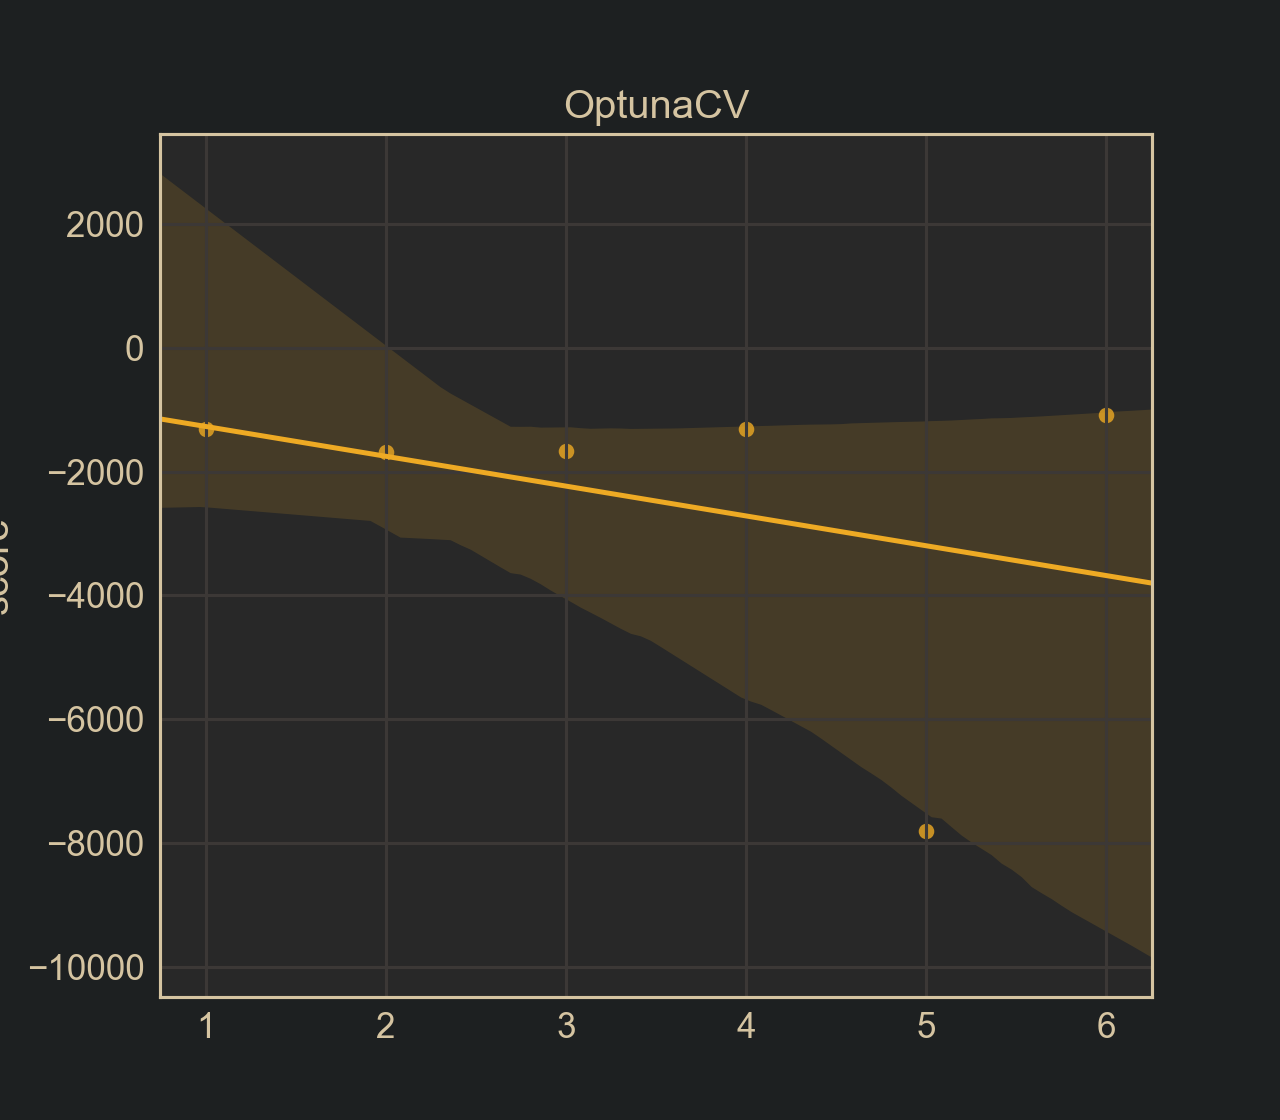

In [9]:
%matplotlib notebook

optimizer.plot()

In [10]:
optimizer.max_iter = 50
optimizer.max_time = 20

In [11]:
optimizer.fit(X, y)

[16:38:45] ITER: 7/50      SCORE: -1150.4617 ± 114.2371      ETA: 15 sec
[16:38:46] ITER: 8/50      SCORE: -1674.7580 ± 115.1342      ETA: 15 sec
[16:38:46] ITER: 9/50      SCORE: -1150.4617 ± 114.2371      ETA: 14 sec
[16:38:47] ITER: 10/50      SCORE: -1082.5087 ± 115.0675      ETA: 14 sec
[16:38:47] ITER: 11/50      SCORE: -1188.2033 ± 146.8267      ETA: 14 sec
[16:38:48] ITER: 12/50      SCORE: -1252.9342 ± 156.0837      ETA: 14 sec
[16:38:48] ITER: 13/50      SCORE: -1131.6448 ± 119.5411      ETA: 13 sec
[16:38:49] ITER: 14/50      SCORE: -1117.3164 ± 115.2883      ETA: 13 sec
[16:38:50] ITER: 15/50      SCORE: -1082.5422 ± 135.7139      ETA: 12 sec
[16:38:50] ITER: 16/50      SCORE: -1112.9297 ± 93.4997      ETA: 12 sec
[16:38:51] ITER: 17/50      SCORE: -1159.0364 ± 96.3895      ETA: 11 sec
[16:38:51] ITER: 18/50      SCORE: -1101.1574 ± 97.7146      ETA: 11 sec
[16:38:52] ITER: 19/50      SCORE: -1173.8482 ± 111.9490      ETA: 11 sec
[16:38:52] ITER: 20/50      SCORE: -1056.193

OptunaCV(cv=5,
         estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100,
                                 n_jobs=-1, num_leaves=31, objective=None,
                                 random_state=None, reg_alpha=0.0,
                                 reg_lambda=0.0, silent=True, subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0),
         max_iter=50, max_time=20, n_digits=4, n_jobs=None,
         param_space={'bagging_fraction': (0.1, 0.9, 0.05),
                      'feature_fraction': (0.1, 0.9, 0.05),
                      'max_depth': (3, 12, 1),
                      'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047,
               

<IPython.core.display.Javascript object>


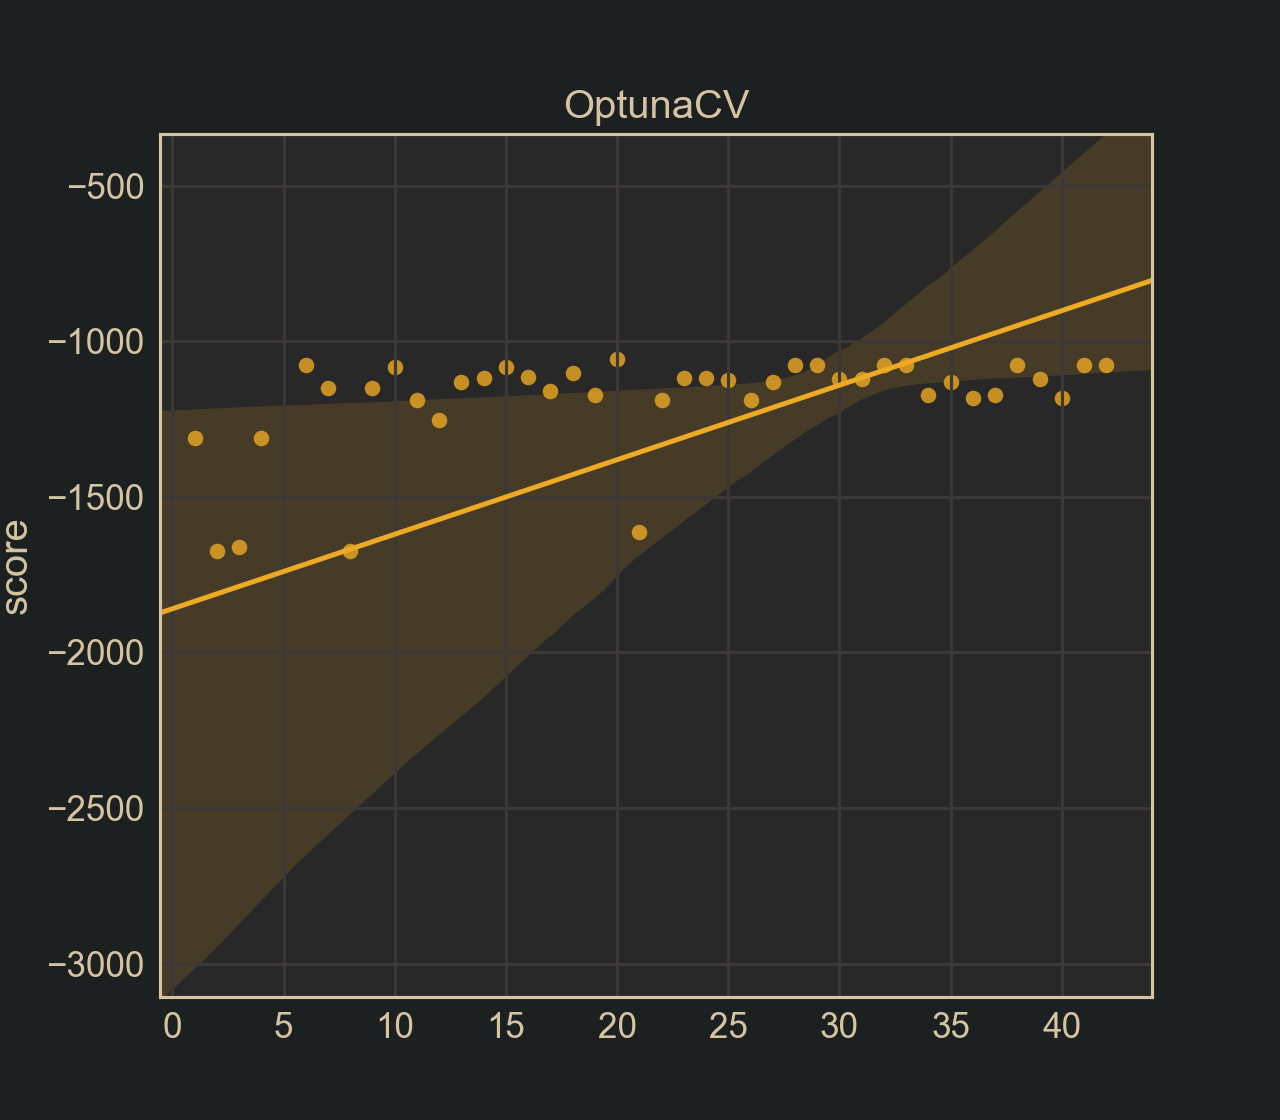

In [12]:
%matplotlib notebook

optimizer.plot()

In [13]:
optimizer.max_time = None

In [14]:
optimizer.fit(X, y)

[16:39:52] ITER: 43/50      SCORE: -1131.6448 ± 119.5411      ETA: 3 sec
[16:39:53] ITER: 44/50      SCORE: -1074.2875 ± 120.6281      ETA: 2 sec
[16:39:54] ITER: 45/50      SCORE: -1159.0364 ± 96.3895      ETA: 2 sec
[16:39:54] ITER: 46/50      SCORE: -1117.3164 ± 115.2883      ETA: 1 sec
[16:39:55] ITER: 47/50      SCORE: -1120.9980 ± 113.0764      ETA: 1 sec
[16:39:55] ITER: 48/50      SCORE: -1131.6448 ± 119.5411      ETA: 954 ms
[16:39:56] ITER: 49/50      SCORE: -1074.2875 ± 120.6281      ETA: 474 ms
[16:39:56] ITER: 50/50      SCORE: -1117.3164 ± 115.2883      ETA: 0 ms
Iterations limit exceed!


OptunaCV(cv=5,
         estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100,
                                 n_jobs=-1, num_leaves=31, objective=None,
                                 random_state=None, reg_alpha=0.0,
                                 reg_lambda=0.0, silent=True, subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0),
         max_iter=50, max_time=None, n_digits=4, n_jobs=None,
         param_space={'bagging_fraction': (0.1, 0.9, 0.05),
                      'feature_fraction': (0.1, 0.9, 0.05),
                      'max_depth': (3, 12, 1),
                      'num_leaves': {15, 31, 63, 127, 255, 511, 1023, 2047,
             

<IPython.core.display.Javascript object>


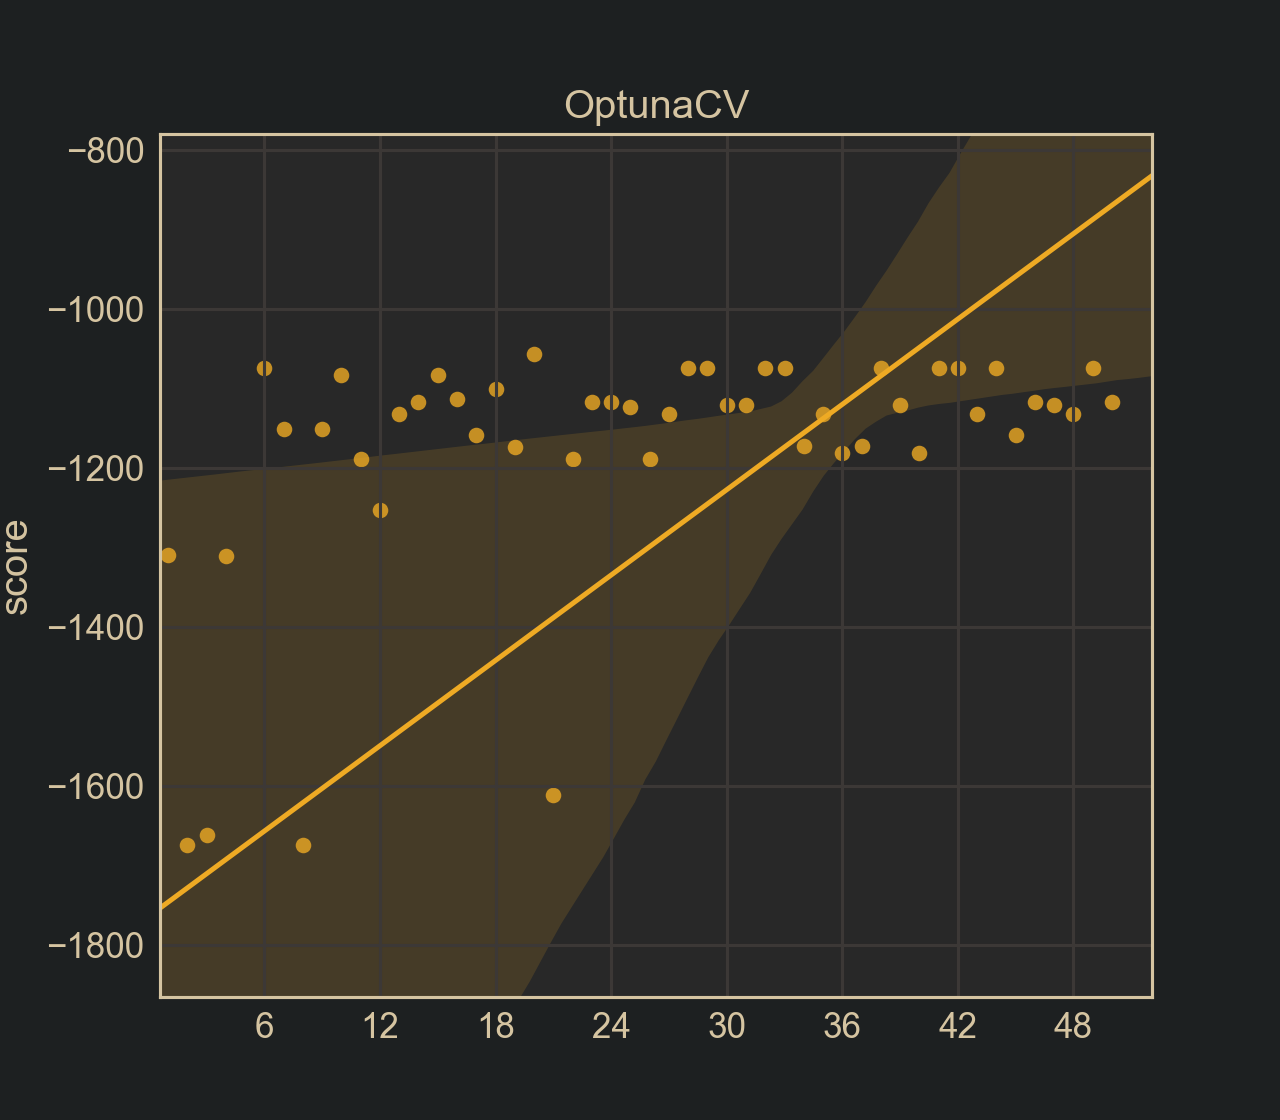

In [15]:
%matplotlib notebook

optimizer.plot()